<a href="https://colab.research.google.com/github/zacknn/MachineLearning/blob/main/projects/drawing_recognition/model/model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import the drive module from google.colab to access Google Drive.
from google.colab import drive
# Mount Google Drive to the '/content/drive' directory.
# This allows the Colab environment to read from and write to your Google Drive.
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Create a new directory named 'quickdraw'.
# This directory will be used to store the downloaded QuickDraw dataset files.
!mkdir quickdraw

In [3]:
# Define a list of categories (objects) for which we want to download QuickDraw dataset files.
categories = [
    "cat",
    "car",
    "helicopter",
    "star",
    "house",
    "cloud",
    "sun"
]

In [4]:
# Define the base URL for the QuickDraw dataset NumPy bitmap files.
base_url = "https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/"

# Loop through each category in the 'categories' list.
for c in categories:
    # Print a message indicating which category is being downloaded.
    print(f"Downloading {c}...")
    # Use the 'wget' command to download the .npy file for the current category.
    # The '-O quickdraw/{c}.npy' option saves the downloaded file into the 'quickdraw' directory
    # with the name of the category followed by '.npy'.
    !wget "{base_url}{c}.npy" -O quickdraw/{c}.npy

--2025-11-28 15:12:19--  https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/cat.npy
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.203.207, 74.125.199.207, 142.251.188.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.203.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 96590448 (92M) [application/octet-stream]
Saving to: ‘quickdraw/cat.npy’

quickdraw/cat.npy   100%[===================>]  92.12M   189MB/s    in 0.5s    

2025-11-28 15:12:20 (189 MB/s) - ‘quickdraw/cat.npy’ saved [96590448/96590448]

--2025-11-28 15:12:20--  https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/car.npy
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.203.207, 74.125.199.207, 142.251.188.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.203.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 143287056 (137M) [application/o

In [5]:
# Import the tensorflow library, which is a powerful open-source machine learning framework.
import tensorflow as tf
# Import the layers and models modules from tensorflow.keras.
# 'layers' is used to define different types of neural network layers (e.g., Conv2D, Dense).
# 'models' is used to assemble layers into a complete neural network model (e.g., Sequential).
from tensorflow.keras import layers , models

In [6]:
# Define a function to create a Convolutional Neural Network (CNN) model.
# It takes 'num_classes' as an argument, which is the number of distinct categories to classify.
def create_model(num_classes=7):
  # Initialize a Sequential model, which is a linear stack of layers.
  model = models.Sequential([
    # First Convolutional Layer:
    # 32 filters, each 3x3 pixels.
    # 'relu' (Rectified Linear Unit) activation function.
    # 'input_shape=(28,28,1)' specifies the input dimensions for the first layer:
    # 28x28 pixels for image height/width, and 1 channel for grayscale images.
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28,28,1)),
    # First MaxPooling Layer:
    # Reduces the spatial dimensions of the output from the convolutional layer.
    # (2,2) means it takes the maximum value over a 2x2 window.
    layers.MaxPooling2D(2,2),

    # Second Convolutional Layer:
    # 64 filters, each 3x3 pixels, 'relu' activation.
    layers.Conv2D(64 , (3,3) , activation='relu'),
    # Second MaxPooling Layer:
    # Further reduces spatial dimensions.
    layers.MaxPooling2D(2,2),

    # Flatten Layer:
    # Converts the 2D feature maps from the previous layer into a 1D vector.
    # This is necessary before feeding data into a Dense (fully connected) layer.
    layers.Flatten(),
    # First Dense (Fully Connected) Layer:
    # 128 neurons with 'relu' activation.
    layers.Dense(128, activation='relu'),
    # Dropout Layer:
    # Randomly sets 30% of input units to 0 during training.
    # This helps prevent overfitting by encouraging the network to learn more robust features.
    layers.Dropout(0.3),
    # Output Dense Layer:
    # 'num_classes' neurons, one for each category.
    # 'softmax' activation function outputs a probability distribution over the classes,
    # ensuring that the sum of probabilities for all classes equals 1.
    layers.Dense(num_classes, activation='softmax'),
  ])
  # Compile the model:
  # 'optimizer=’adam’': An efficient optimization algorithm.
  # 'loss=’sparse_categorical_crossentropy’': Suitable for integer labels when there are more than two classes.
  # 'metrics=[’accuracy’]': The metric to evaluate the model's performance during training and testing.
  model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
  )
  # Return the compiled model.
  return model

In [7]:
# Import numpy for numerical operations, especially for handling arrays.
import numpy as np
# Import train_test_split from sklearn.model_selection for splitting datasets.
from sklearn.model_selection import train_test_split

# Initialize empty lists to store image data (features) and corresponding labels.
X = [] # Features (images)
y = [] # Labels (categories)

# Iterate through each category and its index in the 'categories' list.
for i, category in enumerate(categories):
    # Load the NumPy array (.npy file) for the current category.
    data = np.load(f'quickdraw/{category}.npy')
    # Limit the number of images loaded per category to 10,000 to manage RAM usage.
    # Only take the first 10,000 samples if available.
    data = data[:10000]
    # Reshape the loaded data.
    # Each image is 28x28 pixels, and we need to add a channel dimension for CNN input (28, 28, 1).
    # -1 tells numpy to infer the number of samples.
    data = data.reshape(-1, 28, 28, 1)
    # Normalize pixel values.
    # Convert data type to float32 and scale pixel values from 0-255 to 0-1.
    # This helps in faster convergence and better performance of neural networks.
    data = data.astype('float32') / 255.
    # Append the preprocessed image data to the 'X' list.
    X.append(data)
    # Create labels for the current category.
    # np.full creates an array of the same shape as 'data' filled with the current category's index 'i'.
    y.append(np.full(data.shape[0], i))

# Concatenate all image data arrays from the 'X' list into a single NumPy array.
X = np.concatenate(X)
# Concatenate all label arrays from the 'y' list into a single NumPy array.
y = np.concatenate(y)

# Print information about the loaded and preprocessed dataset.
print(f"Total number of images: {X.shape[0]}")
print(f"Shape of an image: {X.shape[1:]}")
print(f"Number of labels: {y.shape[0]}")
print(f"Example labels: {y[:5]}")

Total number of images: 70000
Shape of an image: (28, 28, 1)
Number of labels: 70000
Example labels: [0 0 0 0 0]


Now that the data is loaded and preprocessed, we'll split it into training and testing sets. A common split is 80% for training and 20% for testing.

In [8]:
# Split the dataset into training and testing sets.
# X: image data, y: labels.
# test_size=0.2 means 20% of the data will be used for testing, and 80% for training.
# random_state=42 ensures reproducibility of the split.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the resulting training and testing sets to verify the split.
print(f"Training data shape: {X_train.shape}")
print(f"Training labels shape: {y_train.shape}")
print(f"Testing data shape: {X_test.shape}")
print(f"Testing labels shape: {y_test.shape}")

Training data shape: (56000, 28, 28, 1)
Training labels shape: (56000,)
Testing data shape: (14000, 28, 28, 1)
Testing labels shape: (14000,)


In [9]:
# Create an instance of the model using the create_model function.
# num_classes is set to the number of categories defined earlier.
model = create_model(num_classes=len(categories))
# Print a summary of the model's architecture.
# This includes the layer names, output shapes, and number of parameters for each layer.
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 7)              │           903 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 224,647 (877.53 KB)

 Trainable params: 224,647 (877.53 KB)

 Non-trainable params: 0 (0.00 B)

Now, let's train the model using the prepared training and testing data.

In [13]:
# Define batch size for training.
BATCH_SIZE = 32

# Create TensorFlow Dataset objects for training and validation.
# from_tensor_slices creates a Dataset from tensors.
# shuffle() shuffles the data to ensure randomness in batches.
# batch() combines consecutive elements of this dataset into batches.
# prefetch() allows later elements to be prepared while the current element is being processed, improving performance.
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train))
train_dataset = train_dataset.shuffle(buffer_size=1024).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

validation_dataset = tf.data.Dataset.from_tensor_slices((X_test, y_test))
validation_dataset = validation_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

# Train the model using the prepared batched datasets.
history = model.fit(
    train_dataset, # Training data and labels as a tf.data.Dataset
    epochs=13, # Number of times the model will iterate over the entire training dataset. (Adjustable)
    validation_data=validation_dataset # Validation data as a tf.data.Dataset
)

Epoch 1/13
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9950 - loss: 0.0149 - val_accuracy: 0.9593 - val_loss: 0.3981
Epoch 2/13
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9944 - loss: 0.0160 - val_accuracy: 0.9600 - val_loss: 0.3672
Epoch 3/13
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9946 - loss: 0.0151 - val_accuracy: 0.9593 - val_loss: 0.3630
Epoch 4/13
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9951 - loss: 0.0149 - val_accuracy: 0.9586 - val_loss: 0.3416
Epoch 5/13
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9944 - loss: 0.0180 - val_accuracy: 0.9590 - val_loss: 0.4021
Epoch 6/13
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9951 - loss: 0.0149 - val_accuracy: 0.9589 - val_loss: 0.3954
Epoch 7/13
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9942 - loss: 0.0180 - val_accuracy: 0.9610 - val_loss: 0.3747
Epoch 8/13
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9949 - loss: 0.0146 - 

To save the trained model, we'll use the `save` method provided by Keras. It's good practice to save models to Google Drive so they are not lost when the Colab runtime recycles.

In [17]:
# Define the path where the model will be saved.
# '/content/drive/MyDrive/' is the default path for your Google Drive.
model_save_path = '/content/drive/MyDrive/quickdraw_model.keras'

# Save the model
model.save(model_save_path)

print(f"Model saved successfully to {model_save_path}")

Model saved successfully to /content/drive/MyDrive/quickdraw_model.keras


Let's evaluate the model on the test dataset to see its overall performance.

In [14]:
loss, accuracy = model.evaluate(validation_dataset)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9594 - loss: 0.3936
Test Loss: 0.3982
Test Accuracy: 0.9596


Now, let's make some predictions on a few test images and visualize them to see how well the model is performing visually.

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 516ms/step


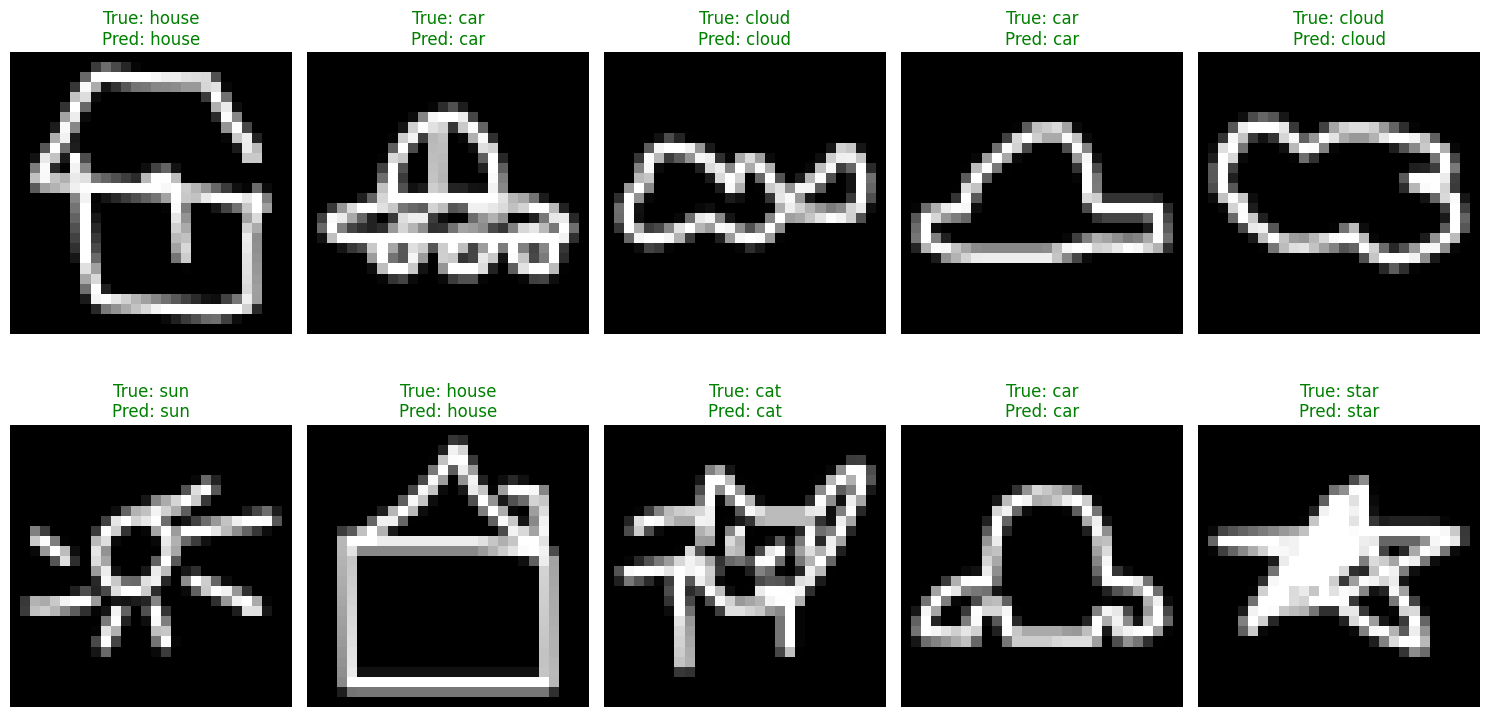

In [15]:
import matplotlib.pyplot as plt
import numpy as np

# Get a few images from the test set for prediction
num_samples = 10
sample_indices = np.random.choice(len(X_test), num_samples, replace=False)
sample_images = X_test[sample_indices]
sample_labels = y_test[sample_indices]

# Make predictions
predictions = model.predict(sample_images)
predicted_classes = np.argmax(predictions, axis=1)

# Plot the images and their predictions
plt.figure(figsize=(15, 8))
for i in range(num_samples):
    plt.subplot(2, 5, i + 1)
    plt.imshow(sample_images[i].reshape(28, 28), cmap='gray')
    true_label = categories[sample_labels[i]]
    pred_label = categories[predicted_classes[i]]
    color = 'green' if true_label == pred_label else 'red'
    plt.title(f"True: {true_label}\nPred: {pred_label}", color=color)
    plt.axis('off')
plt.tight_layout()
plt.show()